#  PL6 - Learning a non-linear function

- Polynomial Regression
- Regression Splines
- Generalized Additive Models - GAMs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np

## Load dataset

Collected from:
https://www.statlearning.com/resources-python

In [2]:
df = pd.read_csv('Wage.csv')
df.head(5)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


###Creating X and Y values

In [4]:
X = df[['age']]
y = df[['wage']]

### Splitting the data into train and test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)


## Data Visualization

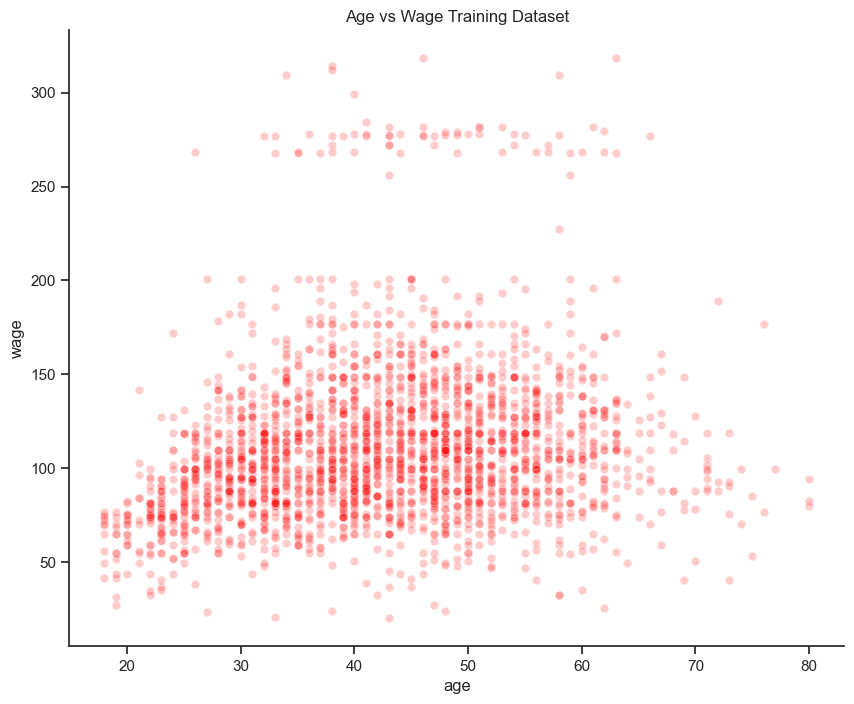

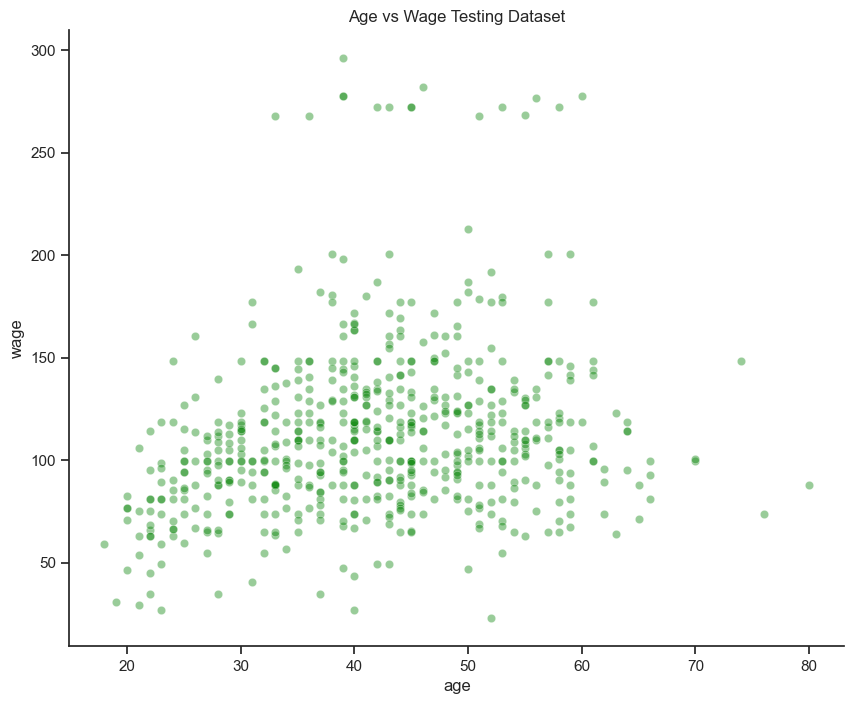

In [6]:
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train['age'], y=y_train['wage'], color="red",alpha=0.2)
plt.title("Age vs Wage Training Dataset")

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_test['age'], y=y_test['wage'], color="green",alpha=0.4)
plt.title("Age vs Wage Testing Dataset")

plt.show()

## Applying Linear Regression on the Dataset

In [7]:
lm = LinearRegression()
lm.fit(X_train,y_train)

print("Slope of the Regression Line is : ", lm.coef_)
print("Intercept of Regression Line is : ",lm.intercept_)

# Training data
pred_train = lm.predict(X_train)
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = lm.predict(X_test)
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

print("Accuracy of Linear Regression on testing data is : ",rmse_test)


Slope of the Regression Line is :  [[0.68904221]]
Intercept of Regression Line is :  [82.09009765]
Accuracy of Linear Regression on testing data is :  40.68927607250081


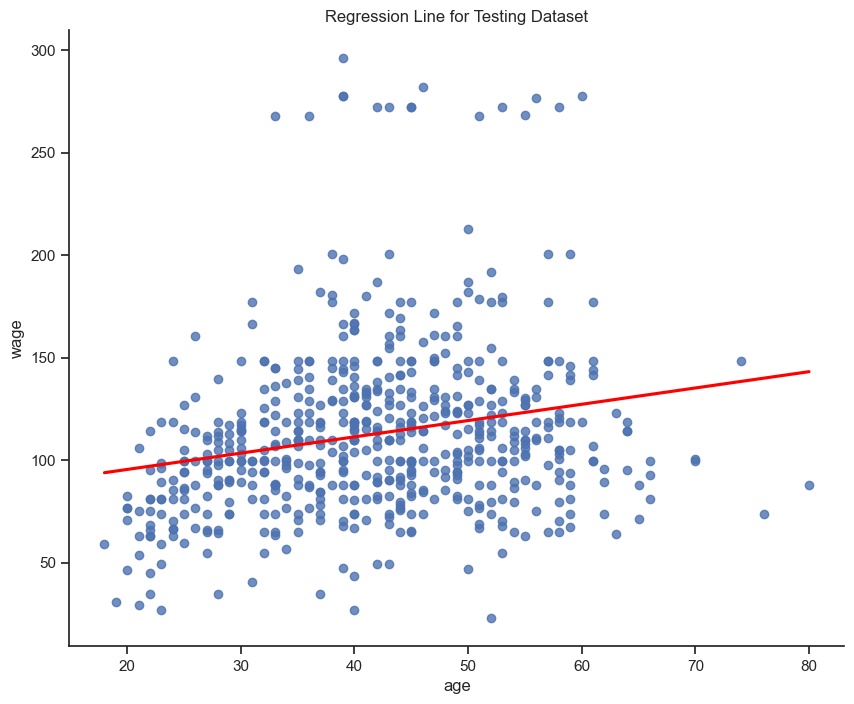

In [8]:
plt.figure(figsize=(10,8))
sns.regplot(x=X_test['age'], y=y_test['wage'], ci=None, line_kws={"color": "red"})
plt.title("Regression Line for Testing Dataset")
plt.show()

In [9]:
# Save model results
model_results_lm = pd.DataFrame(
    {
    "model": "Linear Model (lm)",
    "rmse_train": [rmse_train],
    "rmse_test": [rmse_test],
    })
model_results_lm

,model,rmse_train,rmse_test
0,Linear Model (lm),40.97474,40.689276


## Applying Polynomial Regression

In [10]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
pm = LinearRegression()
pm.fit(X_train_poly,y_train)

# Training data
pred_train = pm.predict(X_train_poly)
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = pm.predict(X_test_poly)
rmse_test =mean_squared_error(y_test,pred_test,squared=False)

print("Accuracy of Polynomial Regression on testing data is : ",rmse_test)

Accuracy of Polynomial Regression on testing data is :  39.50852566554632


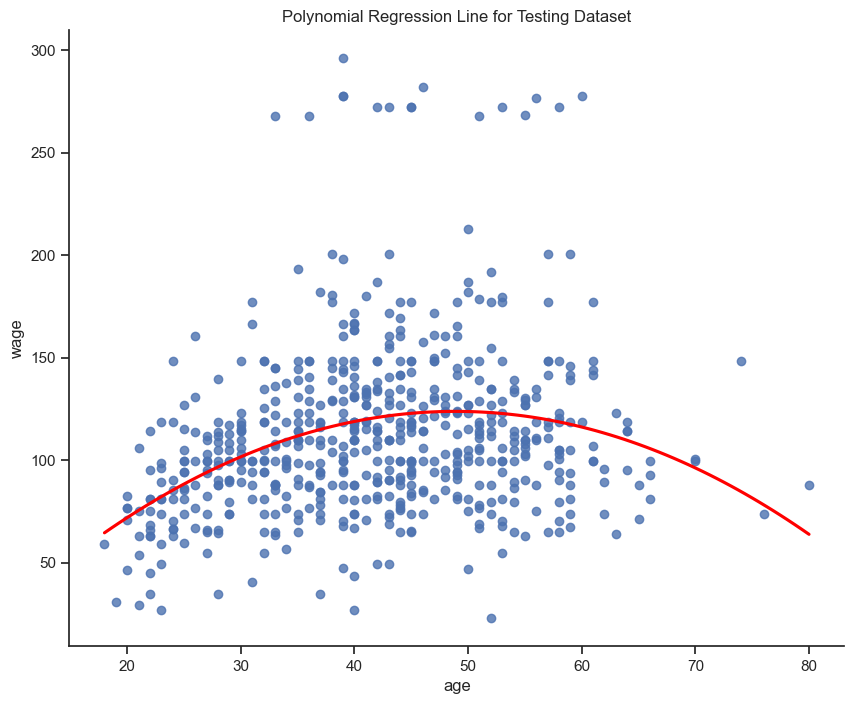

In [11]:
plt.figure(figsize=(10,8))
sns.regplot(x=X_test['age'], y=y_test['wage'], ci=None, line_kws={"color": "red"},order=2)
plt.title("Polynomial Regression Line for Testing Dataset")
plt.show()

In [12]:
# Save model results
model_results_pm = pd.DataFrame(
    {
    "model": "Polynomial Model (pm)",
    "rmse_train": [rmse_train],
    "rmse_test": [rmse_test],
    })

results = pd.concat([model_results_lm, model_results_pm], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),40.974740,40.689276
0,Polynomial Model (pm),40.091344,39.508526


## Implementation of Cubic Spline

In [13]:
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"train": X_train},return_type='dataframe')
transformed_x.head(5)

,Intercept,"bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
268,1.0,0.000000,0.034014,0.508194,0.426542,0.03125,0.0
32,1.0,0.047245,0.570275,0.364748,0.017732,0.00000,0.0
199,1.0,0.000000,0.272109,0.611008,0.116883,0.00000,0.0
1488,1.0,0.000000,0.093333,0.603939,0.295977,0.00675,0.0
228,1.0,0.008815,0.451692,0.493398,0.046095,0.00000,0.0


Accuracy for Cubic Spline on testing data is :  39.450613233348676


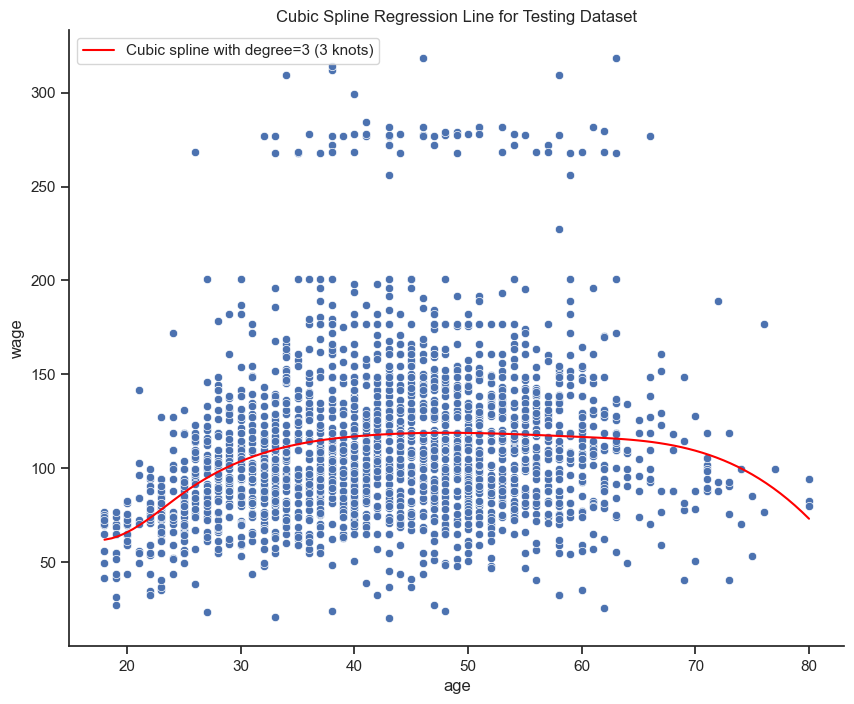

In [14]:
cs = sm.GLM(y_train, transformed_x).fit()

# Training data
pred_train = cs.predict(dmatrix("bs(train, knots=(25,40,60), include_intercept=False)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = cs.predict(dmatrix("bs(test, knots=(25,40,60), include_intercept=False)",
                               {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)
print("Accuracy for Cubic Spline on testing data is : ",rmse_test)

plt.figure(figsize=(10,8))
xp = np.linspace(X_test.min(),X_test.max(), 100)
pred = cs.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)",
                          {"xp": xp}, return_type='dataframe'))
sns.scatterplot(x=X_train['age'], y=y_train['wage'])
plt.plot(xp, pred, label='Cubic spline with degree=3 (3 knots)', color='red')
plt.legend()
plt.title("Cubic Spline Regression Line for Testing Dataset")
plt.show()

In [15]:
# Save model results
model_results_cs = pd.DataFrame(
    {
    "model": "Cubic spline (cs)",
    "rmse_train": [rmse_train],
    "rmse_test": [rmse_test]
    })
results = pd.concat([results, model_results_cs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),40.974740,40.689276
0,Polynomial Model (pm),40.091344,39.508526
0,Cubic spline (cs),39.988837,39.450613


## Implementation of Natural cubic spline

In [16]:
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')

ncs = sm.GLM(y_train, transformed_x3).fit()

In [17]:
# Training data
pred_train = ncs.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = ncs.predict(dmatrix("cr(test, df=3)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_ncs = pd.DataFrame(
    {
    "model": "Natural cubic spline (ncs)",
    "rmse_train": [rmse_train],
    "rmse_test": [rmse_test]
    })

results = pd.concat([results, model_results_ncs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),40.974740,40.689276
0,Polynomial Model (pm),40.091344,39.508526
0,Cubic spline (cs),39.988837,39.450613
0,Natural cubic spline (ncs),40.152812,39.483457


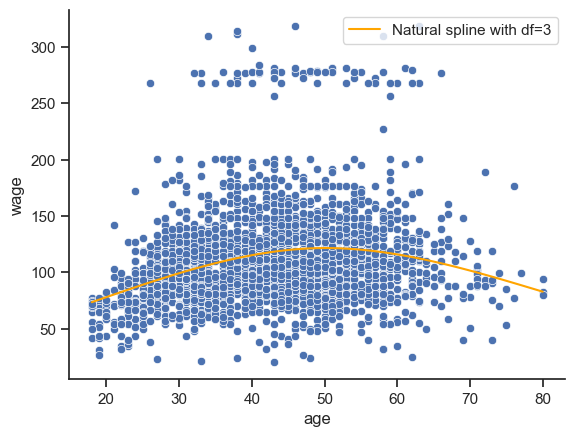

In [18]:
# Make predictions
pred = ncs.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(x=X_train['age'], y=y_train['wage'])
plt.plot(xp, pred, color='orange', label='Natural spline with df=3')
plt.legend();

## Generalized Additive Models (GAMs)

**We can use linear GAMs for regression problems:**

In [ ]:
pip install pygam

In [ ]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [ ]:
gam.summary()

**With LinearGAMs, we can also check the prediction intervals:**

In [ ]:
from pygam import LinearGAM
from pygam.datasets import mcycle

X, y = mcycle(return_X_y=True)

gam = LinearGAM(n_splines=25).gridsearch(X, y)
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');

In [ ]:
# continuing last example with the mcycle dataset
for response in gam.sample(X, y, quantity='y', n_draws=50, sample_at_X=XX):
    plt.scatter(XX, response, alpha=.03, color='k')
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')
plt.title('draw samples from the posterior of the coefficients')

**For binary classification problems, we can use a logistic GAM:**

In [ ]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default

X, y = default(return_X_y=True)

gam = LogisticGAM(f(0) + s(1) + s(2)).gridsearch(X, y)

fig, axs = plt.subplots(1, 3)
titles = ['student', 'balance', 'income']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

**Check the accuracy:**

In [ ]:
gam.accuracy(X, y)

In [ ]:
gam.summary()